In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Questions:
1) What is the percentage of malignant and benign cancer ? (Answer: 37.3% malignant, 62.7% benign)
2) How is the radius mean category in case of malignant cancer ? (Answer:High)
3) How is the texture mean category in case of malignant cancer?(Answer: High )
4) How is the smoothness mean category in case of malignant cancer? (Answer: High)
5) What is the value of compactness mean category in case of malignant cancer? (Answer: 0.8)
6) What is the value of symmetry mean category in case of malignant cancer? (Answer: 0.6)

# Importing libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file 
import matplotlib.pyplot as plt # for plot the graph 
import seaborn as sns
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.model_selection import train_test_split # to split the data into two parts

# Reading The Dataset

In [3]:
df = pd.read_csv('D:\\Faculty\MSP\\archive\\data.csv')
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
df.info() # missing value and datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe (include = 'O')
#df['diagnosis'].value_counts()

diagnosis
count        569
unique         2
top            B
freq         357

# Cleaning

In [6]:
df.drop(columns=['id','Unnamed: 32'],inplace=True)

# Cheking for missing values

In [7]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Statistical Measures about data

In [8]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [9]:
df.iloc[:, :31].groupby('diagnosis').mean()

radius_mean  texture_mean  perimeter_mean   area_mean  \
diagnosis                                                          
B            12.146524     17.914762       78.075406  462.790196   
M            17.462830     21.604906      115.365377  978.376415   

           smoothness_mean  compactness_mean  concavity_mean  \
diagnosis                                                      
B                 0.092478          0.080085        0.046058   
M                 0.102898          0.145188        0.160775   

           concave points_mean  symmetry_mean  fractal_dimension_mean  ...  \
diagnosis                                                              ...   
B                     0.025717       0.174186                0.062867  ...   
M                     0.087990       0.192909                0.062680  ...   

           radius_worst  texture_worst  perimeter_worst   area_worst  \
diagnosis                                                              
B             13.379801      23.515070        87.005938   558.899440   
M             21.134811      29.318208       141.370330  1422.286321   

           smoothness_worst  compactness_worst  concavity_worst  \
diagnosis                                                         
B                  0.124959           0.182673         0.166238   
M                  0.144845           0.374824         0.450606   

           concave points_worst  symmetry_worst  fractal_dimension_worst  
diagnosis                                                                 
B                      0.074444        0.270246                 0.079442  
M                      0.182237        0.323468                 0.091530  

[2 rows x 30 columns]

# Feature extraction

In [10]:
df['radius_mean_cat'] = pd.cut(df['radius_mean'], bins = [0, 12, 16,100], labels = ['Low', 'Normal', 'High'])

In [11]:
df['texture_mean_cat'] = pd.cut(df['texture_mean'], bins = [0, 16, 22,100], labels = ['Low', 'Normal', 'High'])

In [12]:
df['smoothness_mean_cat'] = pd.cut(df['smoothness_mean'], bins = [0, 0.09, 0.11,100], labels = ['Low', 'Normal', 'High'])

In [13]:
df['compactness_mean_cat'] = pd.cut(df['compactness_mean'], bins = [0, 0.06, 0.13,100], labels = ['Low', 'Normal', 'High'])

In [14]:
df['symmetry_mean_cat'] = pd.cut(df['symmetry_mean'], bins = [0, 0.16, 0.2,100], labels = ['Low', 'Normal', 'High'])

In [15]:
df['fractal_dimension_mean_cat'] = pd.cut(df['fractal_dimension_mean'], bins = [0, 0.06, 0.07,100], labels = ['Low', 'Normal', 'High'])

In [16]:
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  concavity_worst  concave points_worst  \
0           0.2419  ...           0.7119                0.2654   
1           0.1812  ...           0.2416                0.1860   
2           0.2069  ...           0.4504                0.2430   
3           0.2597  ...           0.6869                0.2575   
4           0.1809  ...           0.4000                0.1625   
..             ...  ...              ...                   ...   
564         0.1726  ...           0.4107                0.2216   
565         0.1752  ...           0.3215                0.1628   
566         0.1590  ...           0.3403                0.1418   
567         0.2397  ...           0.9387                0.2650   
568         0.1587  ...           0.0000                0.0000   

     symmetry_worst  fractal_dimension_worst  radius_mean_cat  \
0            0.4601                  0.11890             High   
1            0.2750                  0.08902             High   
2            0.3613                  0.08758             High   
3            0.6638                  0.17300              Low   
4            0.2364                  0.07678             High   
..              ...                      ...              ...   
564          0.2060                  0.07115             High   
565          0.2572                  0.06637             High   
566          0.2218                  0.07820             High   
567          0.4087                  0.12400             High   
568          0.2871                  0.07039              Low   

     texture_mean_cat  smoothness_mean_cat  compactness_mean_cat  \
0                 Low                 High                  High   
1              Normal                  Low                Normal   
2              Normal               Normal                  High   
3              Normal                 High                  High   
4                 Low               Normal                  High   
..                ...                  ...                   ...   
564              High                 High                Normal   
565              High               Normal                Normal   
566             

# Encoding

In [31]:
df.diagnosis.unique() 

array([1, 0], dtype=int64)

In [18]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  concavity_worst  concave points_worst  symmetry_worst  \
0         0.2419  ...           0.7119                0.2654          0.4601   
1         0.1812  ...           0.2416                0.1860          0.2750   
2         0.2069  ...           0.4504                0.2430          0.3613   
3         0.2597  ...           0.6869                0.2575          0.6638   
4         0.1809  ...           0.4000                0.1625          0.2364   

   fractal_dimension_worst  radius_mean_cat  texture_mean_cat  \
0                  0.11890             High               Low   
1                  0.08902             High            Normal   
2                  0.08758             High            Normal   
3                  0.17300              Low            Normal   
4                  0.07678             High               Low   

   smoothness_mean_cat  compactness_mean_cat  symmetry_mean_cat  \
0                 High                  High               High   
1                  Low                Normal             Normal   
2               Normal                  High               High   
3                 High                  High               High   
4               Normal                  High             Normal   

   fractal_dimension_mean_cat  
0                        High  
1                         Low  
2                         Low  
3                        High  
4                         Low  

[5 rows x 37 columns]

In [19]:
features_mean= list(df.columns[1:11])
features_se= list(df.columns[11:20])
features_worst=list(df.columns[21:31])

# Visualize the data

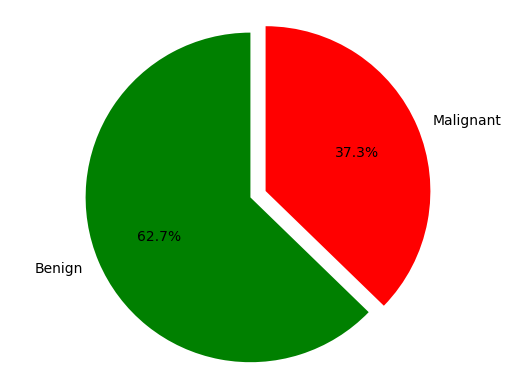

In [20]:
diagnosis_counts = df['diagnosis'].value_counts()
diagnosis_counts
#Create a pie chart
plt.pie(diagnosis_counts, labels=['Benign', 'Malignant'], autopct='%1.1f%%', startangle=90, colors=['Green', 'Red'], explode = (0.1, 0))


# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

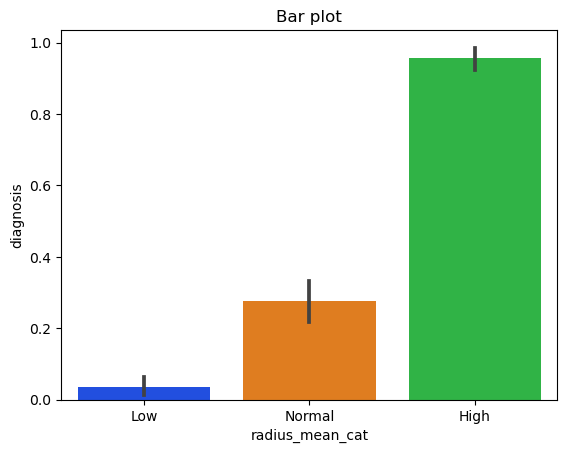

In [21]:
sns.barplot(data=df,
            x="radius_mean_cat",
            y="diagnosis",
            palette = "bright"
           )

plt.title("Bar plot")
plt.show()

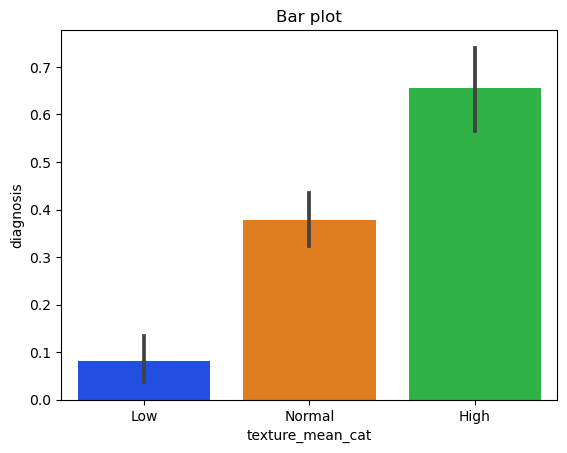

In [22]:
sns.barplot(data=df,
            x="texture_mean_cat",
            y="diagnosis",
            palette = "bright"
           )

plt.title("Bar plot")
plt.show()

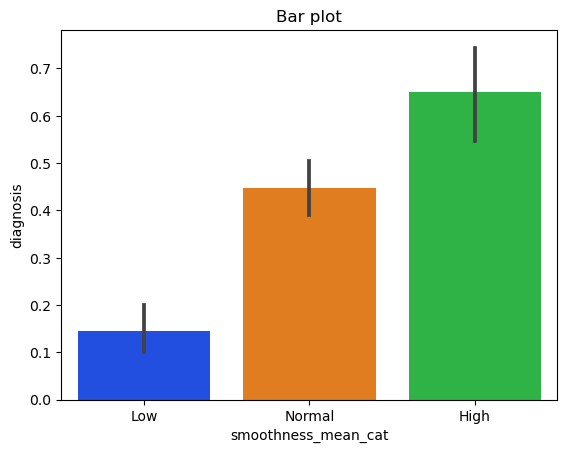

In [23]:
sns.barplot(data=df,
            x="smoothness_mean_cat",
            y="diagnosis",
            palette = "bright"
           )

plt.title("Bar plot")
plt.show()

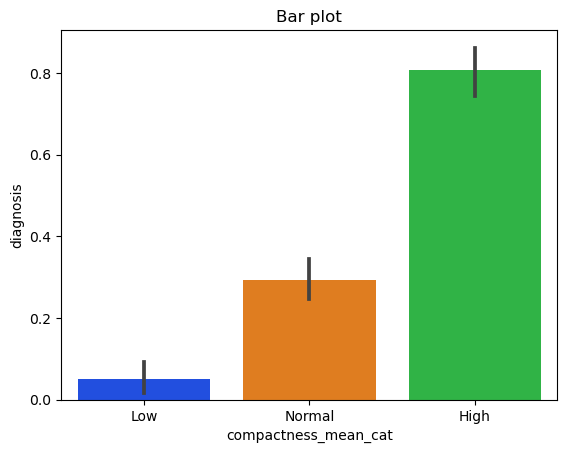

In [24]:
sns.barplot(data=df,
            x="compactness_mean_cat",
            y="diagnosis",
            palette = "bright"
           )

plt.title("Bar plot")
plt.show()

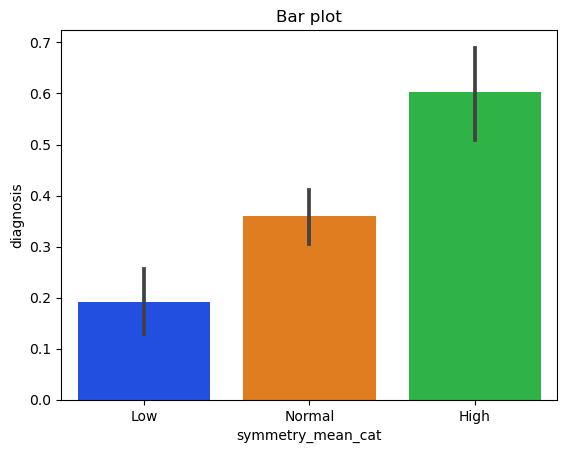

In [25]:
sns.barplot(data=df,
            x="symmetry_mean_cat",
            y="diagnosis",
            palette = "bright"
           )

plt.title("Bar plot")
plt.show()

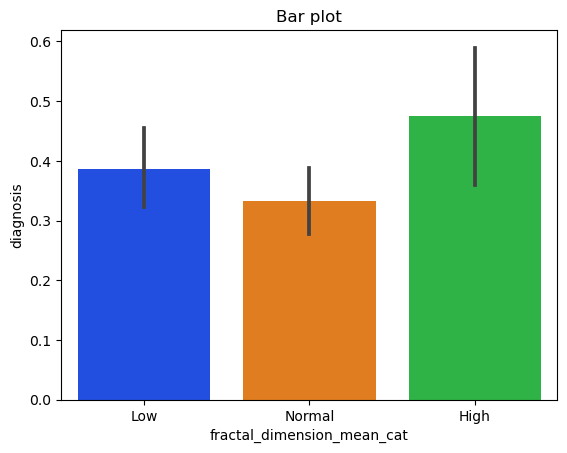

In [26]:
sns.barplot(data=df,
            x="fractal_dimension_mean_cat",
            y="diagnosis",
            palette = "bright"
           )

plt.title("Bar plot")
plt.show()

# EDA

<Axes: >

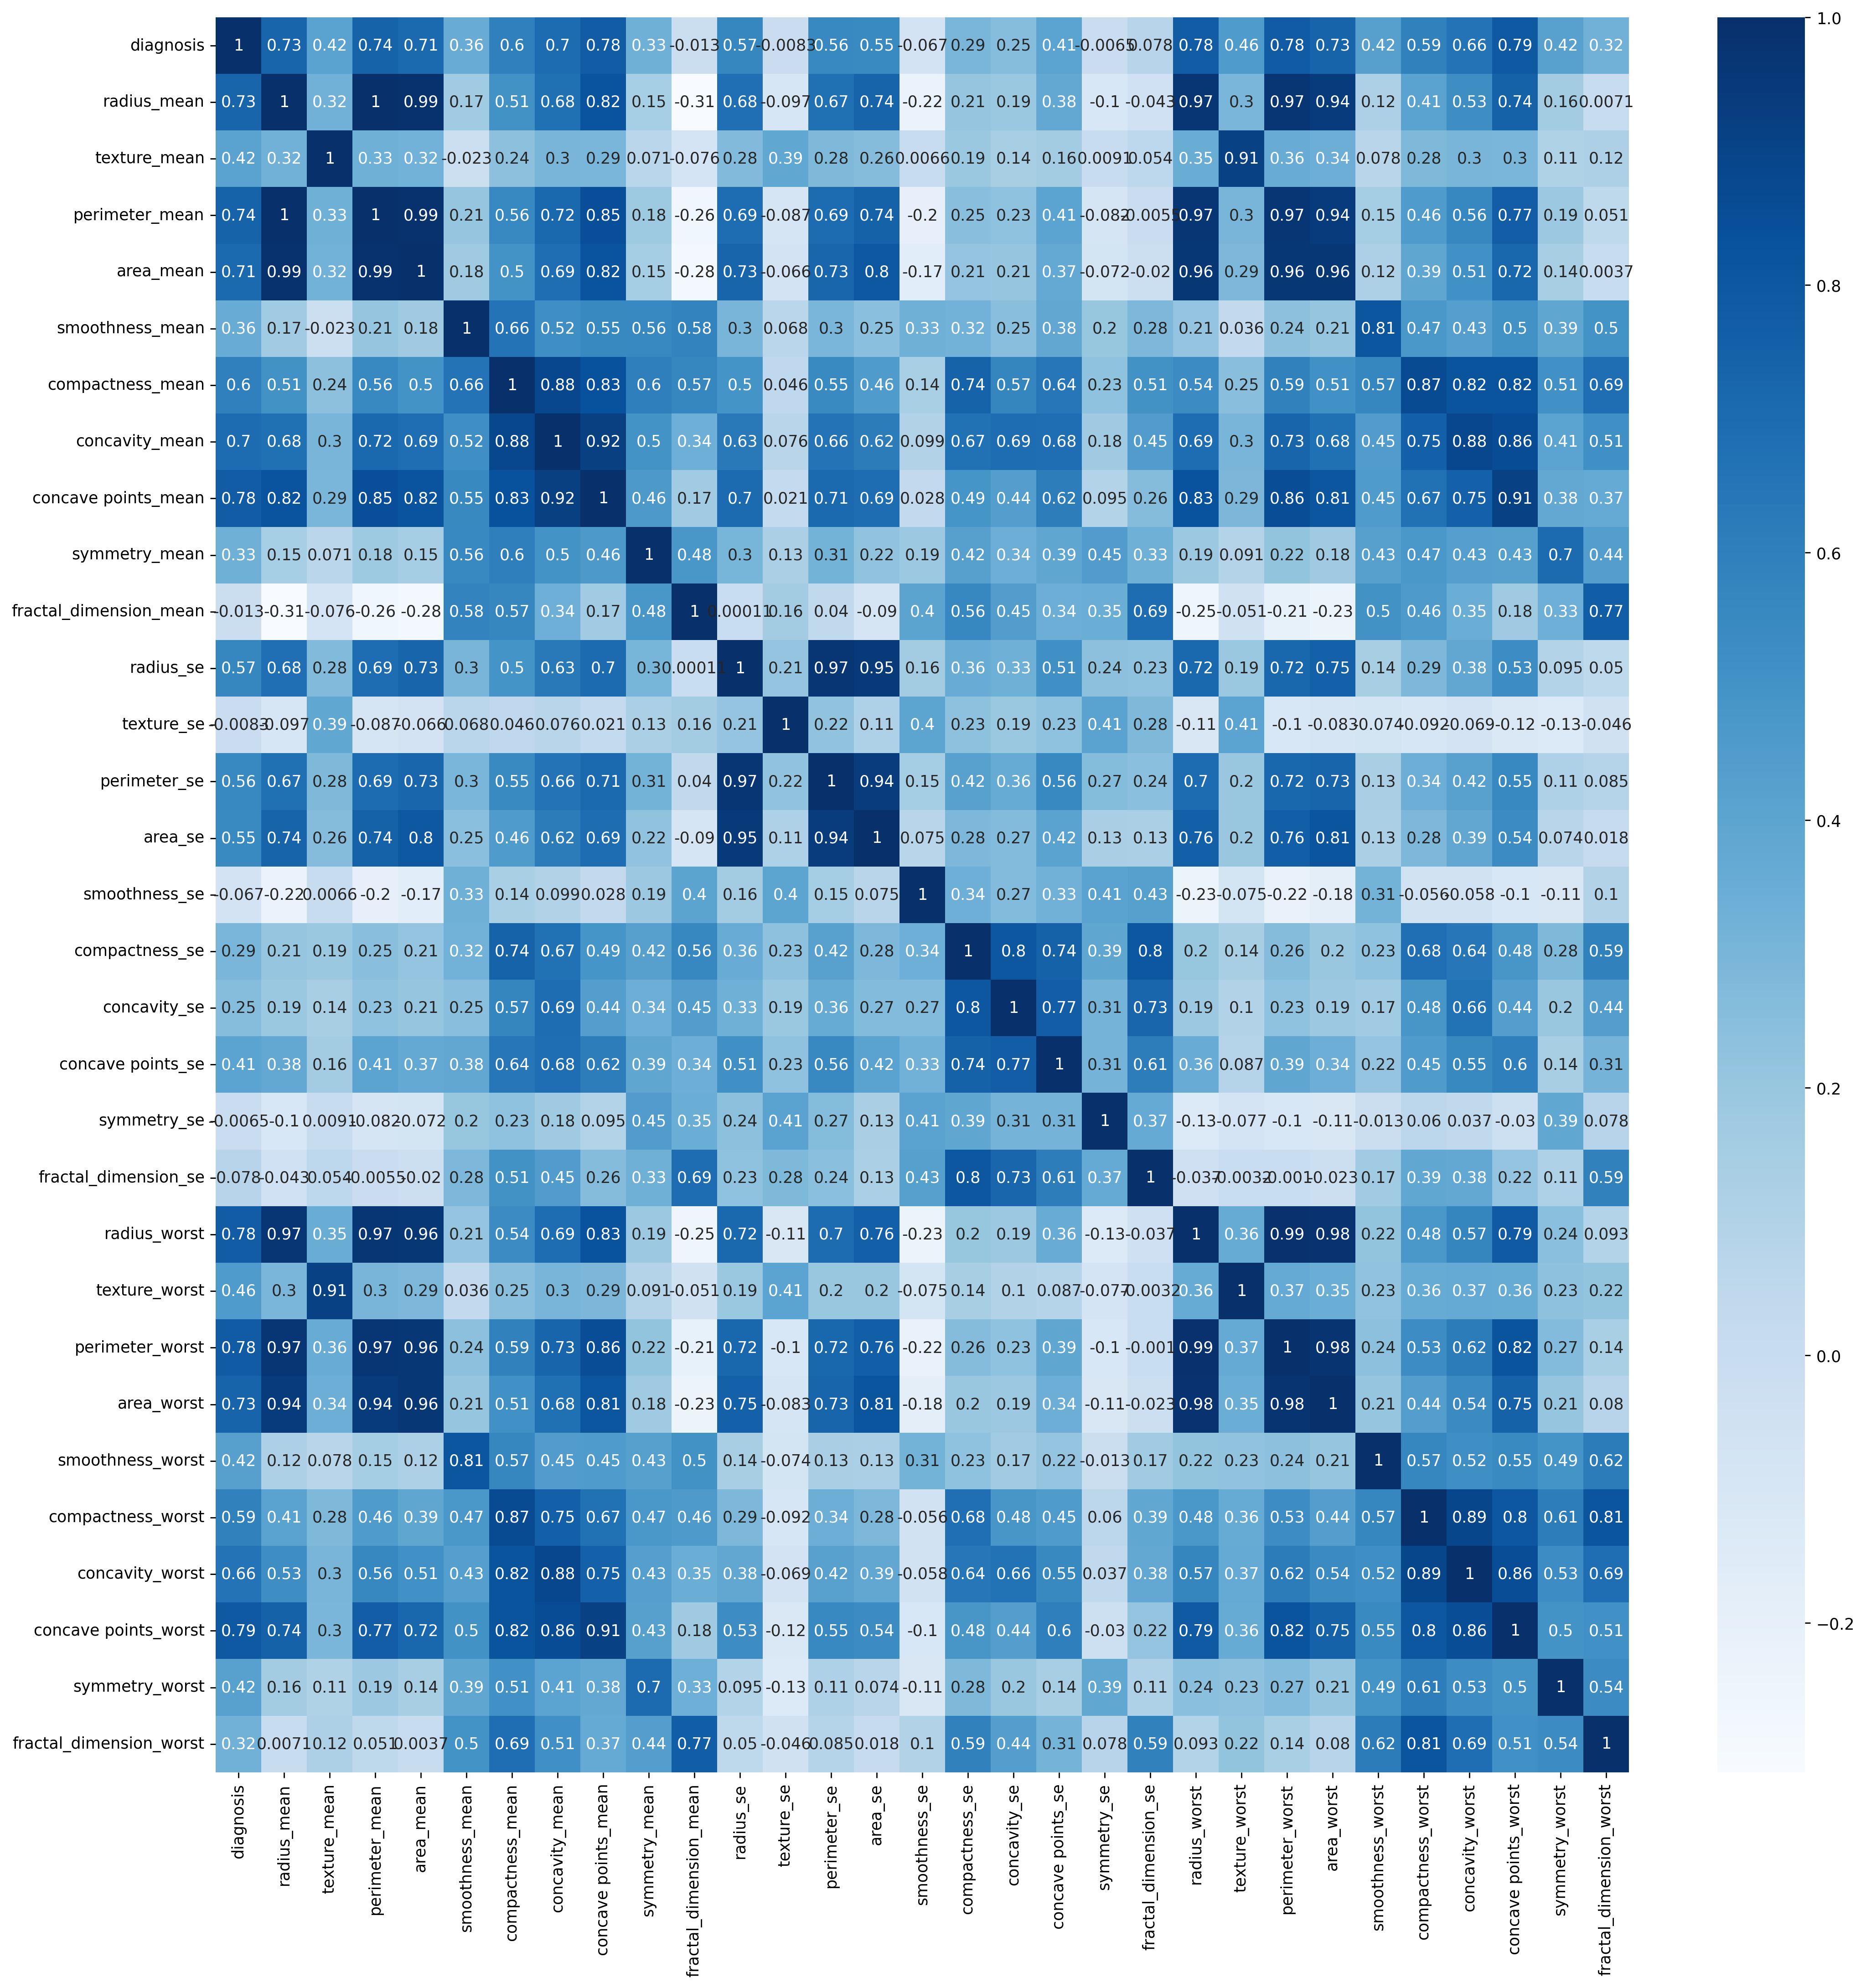

In [27]:
fig = plt.figure(figsize=(20,20), dpi=250)
sns.heatmap(df.iloc[:, :31].corr(), cmap="Blues", annot=True)

<Axes: >

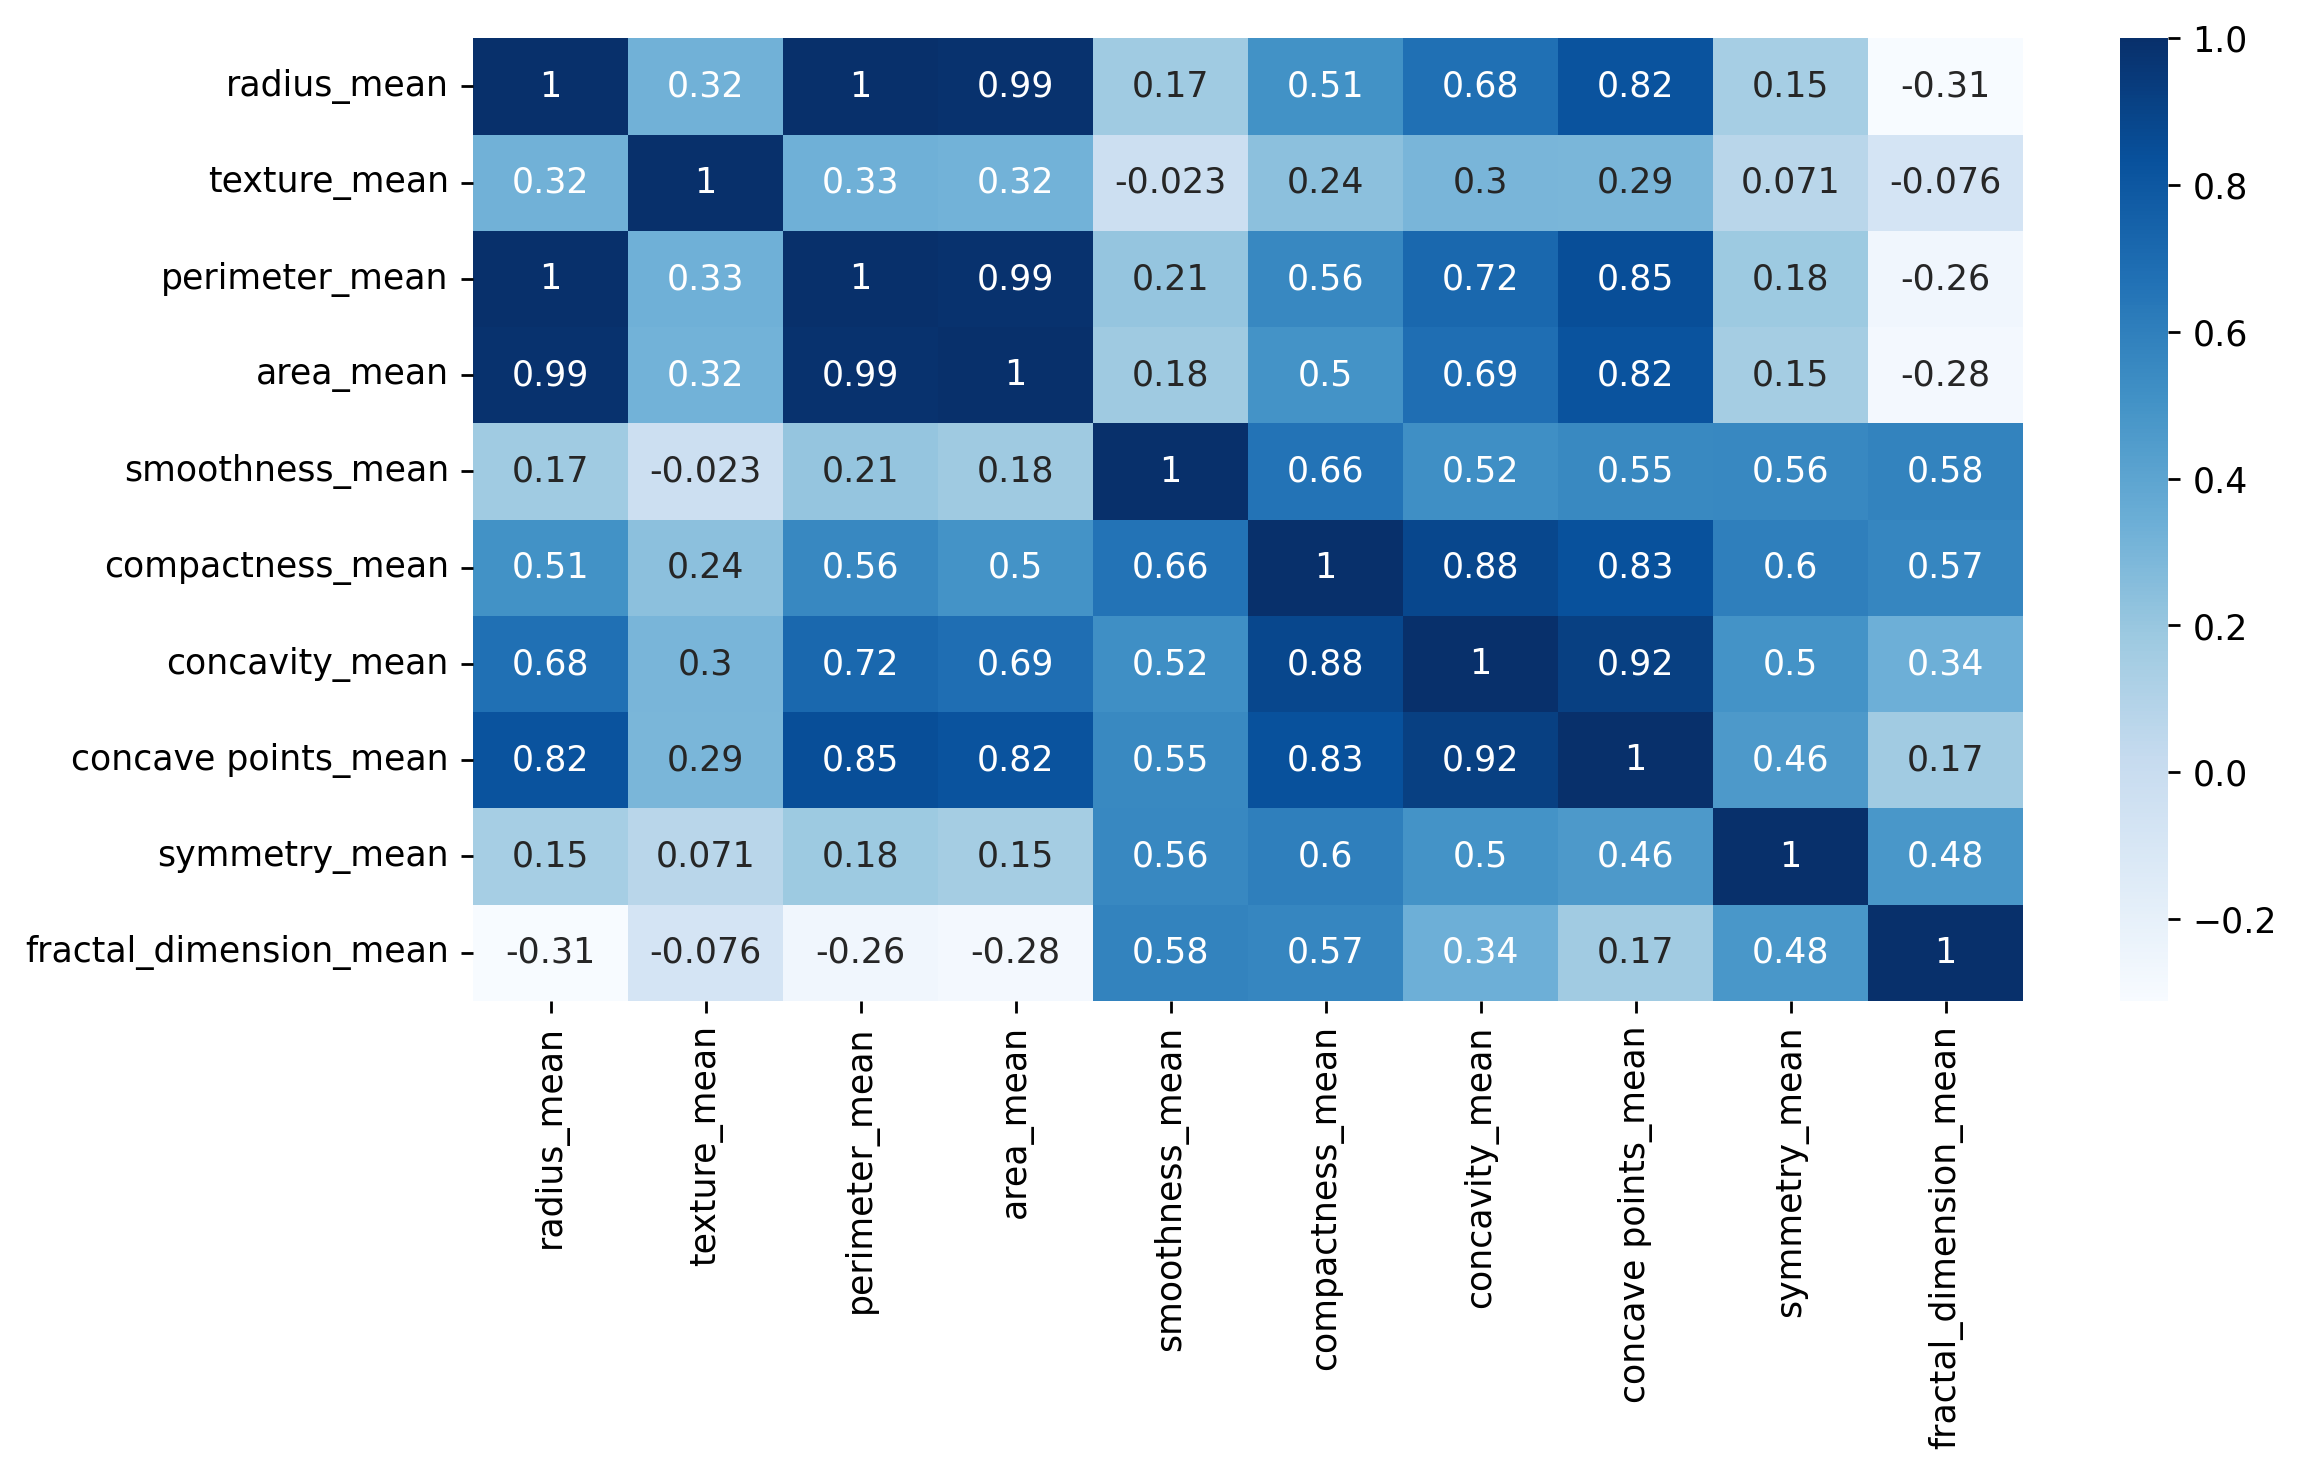

In [28]:
fig = plt.figure(figsize=(10,5), dpi=250)
sns.heatmap(df[features_mean].corr(), cmap="Blues", annot=True)

<Axes: >

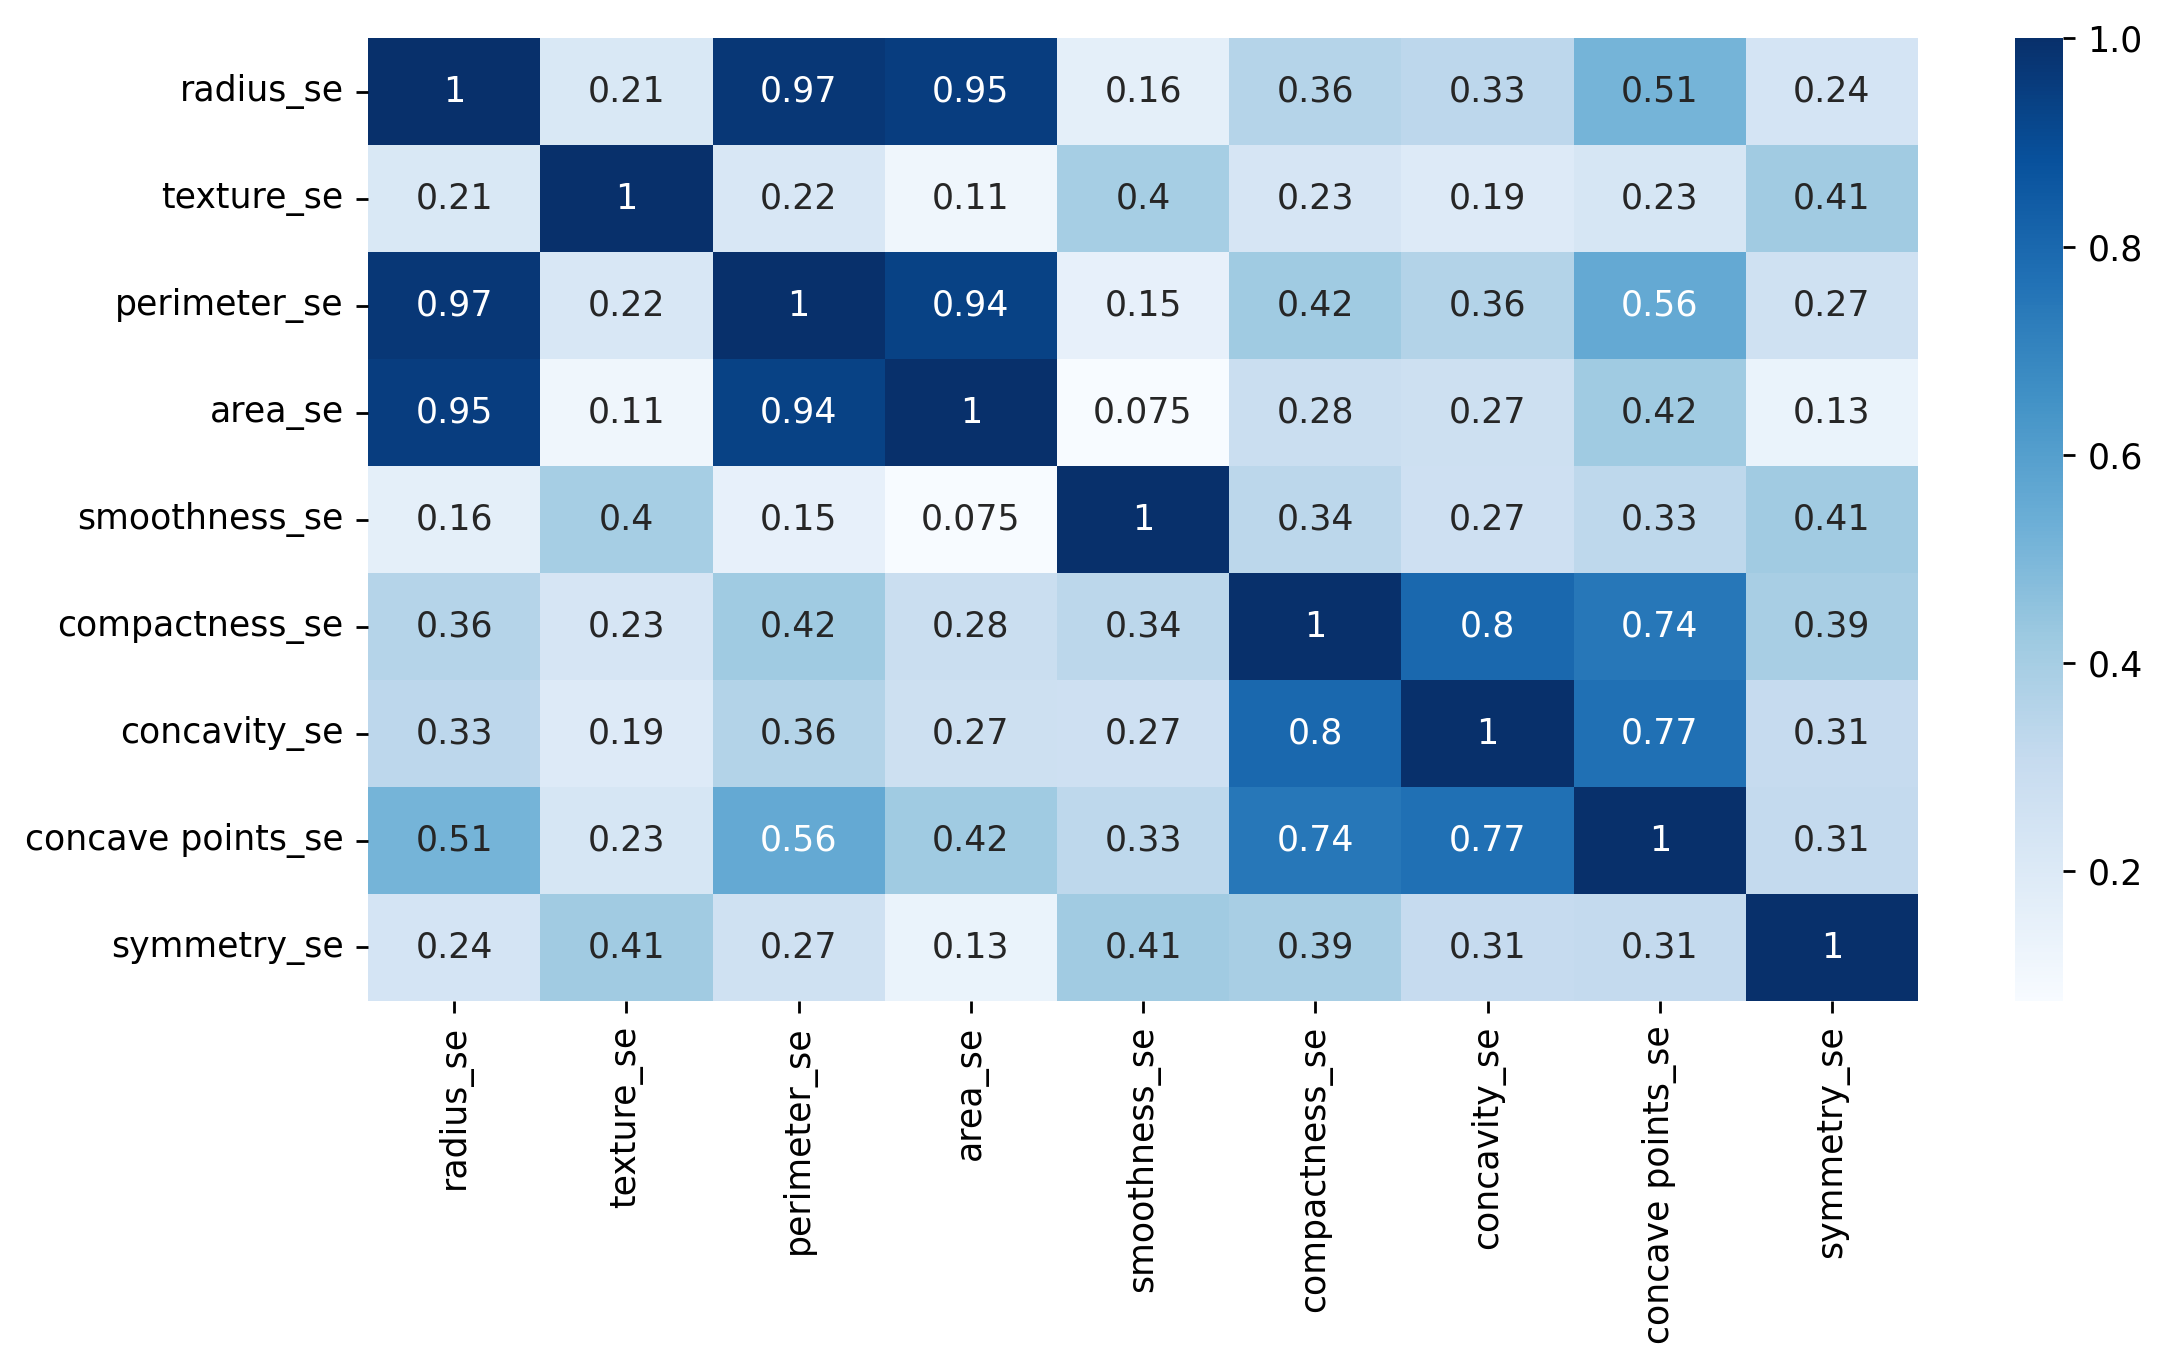

In [29]:
fig = plt.figure(figsize=(10,5), dpi=250)
sns.heatmap(df[features_se].corr(), cmap="Blues", annot=True)

<Axes: >

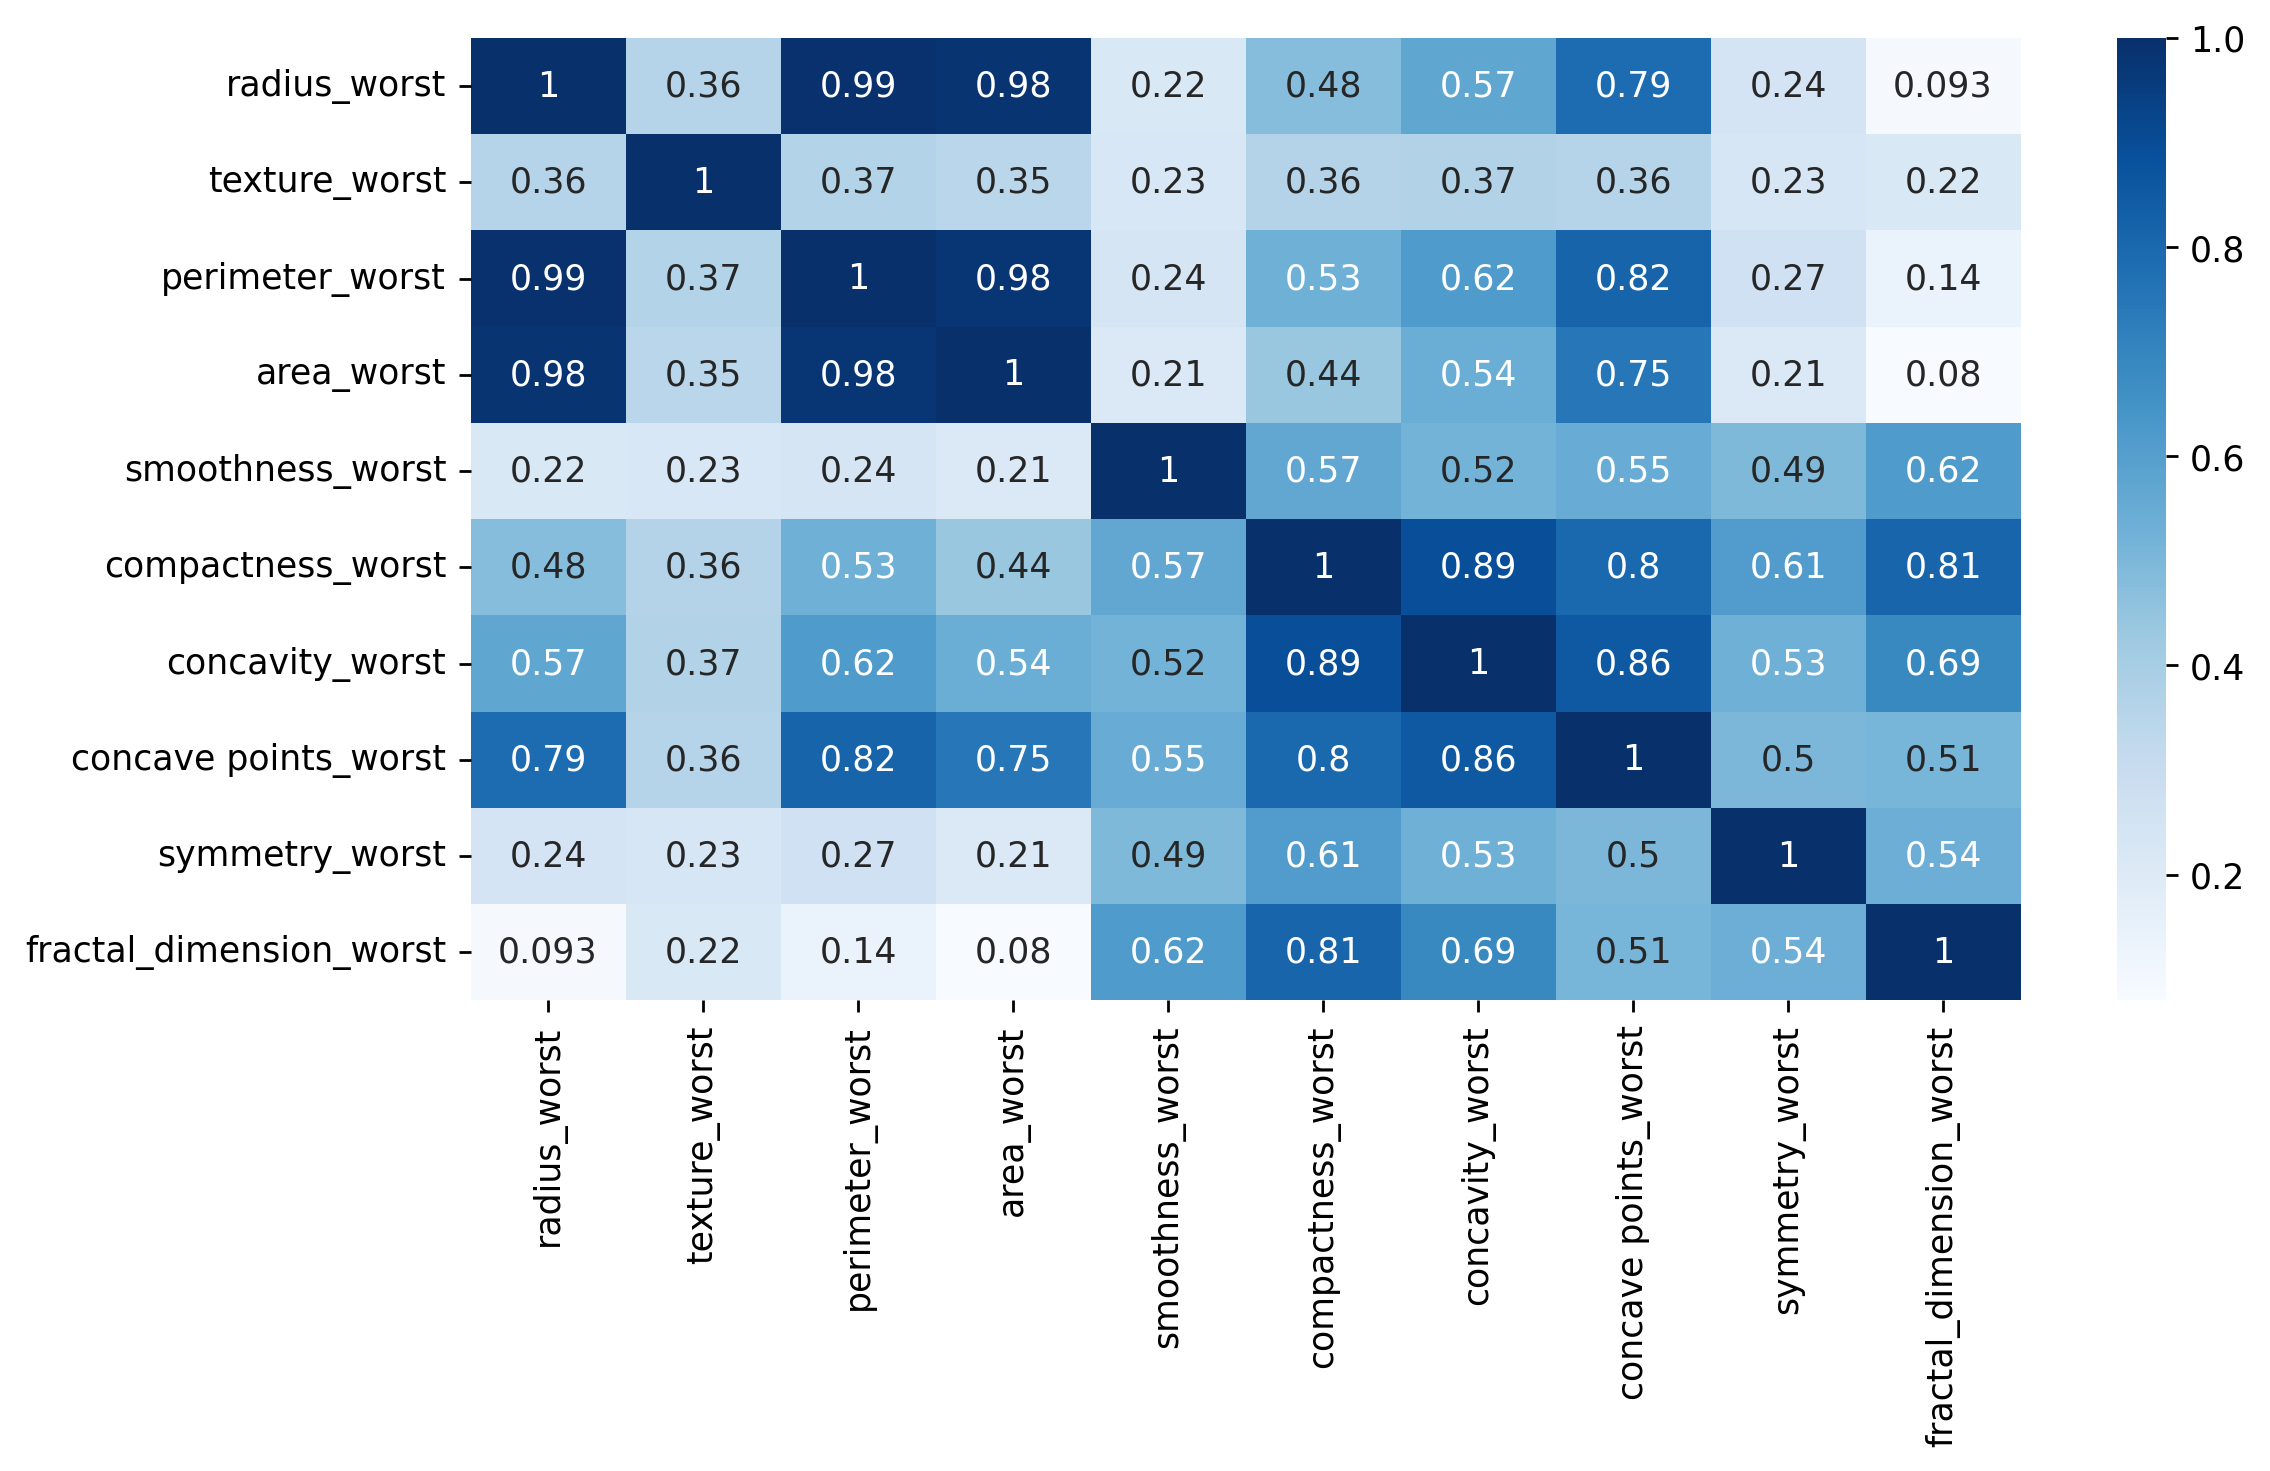

In [30]:
fig = plt.figure(figsize=(10,5), dpi=250)
sns.heatmap(df[features_worst].corr(), cmap="Blues", annot=True)

# Preparing the data

In [40]:
# Spliting the data into Train and Test
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show data after spliting

In [41]:
display(X.head(3), y.head(3))

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   fractal_dimension_mean  ...  concavity_worst  concave points_worst  \
0                 0.07871  ...           0.7119                0.2654   
1                 0.05667  ...           0.2416                0.1860   
2                 0.05999  ...           0.4504                0.2430   

   symmetry_worst  fractal_dimension_worst  radius_mean_cat  texture_mean_cat  \
0          0.4601                  0.11890                0                 1   
1          0.2750                  0.08902                0                 2   
2          0.3613                  0.08758                0                 2   

   smoothness_mean_cat  compactness_mean_cat  symmetry_mean_cat  \
0                    0                     0                  0   
1                    1                     2                  2   
2                    2                     0                  0   

   fractal_dimension_mean_cat  
0                           0  
1                           1  
2                           1  

[3 rows x 36 columns]

0    1
1    1
2    1
Name: diagnosis, dtype: int64

# Converting strings to float

In [36]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df ['radius_mean_cat'] = encoder.fit_transform(df['radius_mean_cat'])
df[['radius_mean_cat']]

df ['texture_mean_cat'] = encoder.fit_transform(df['texture_mean_cat'])
df[['texture_mean_cat']]




df ['smoothness_mean_cat'] = encoder.fit_transform(df['smoothness_mean_cat'])
df[['smoothness_mean_cat']]




df ['compactness_mean_cat'] = encoder.fit_transform(df['compactness_mean_cat'])
df[['compactness_mean_cat']]

df ['symmetry_mean_cat'] = encoder.fit_transform(df['symmetry_mean_cat'])
df[['symmetry_mean_cat']]

df ['fractal_dimension_mean_cat'] = encoder.fit_transform(df['fractal_dimension_mean_cat'])
df[['fractal_dimension_mean_cat']]

fractal_dimension_mean_cat
0                             0
1                             1
2                             1
3                             0
4                             1
..                          ...
564                           1
565                           1
566                           1
567                           0
568                           1

[569 rows x 1 columns]

# Check if there is any other categorical or object columns

In [37]:
df.select_dtypes(include=['O', 'category']).columns

Index([], dtype='object')

# Decision tree model

In [42]:
from sklearn.tree import DecisionTreeClassifier as DTC, DecisionTreeRegressor as DTR 
# Building the model 
tree_clf0 = DTC()
# Fitting the model
tree_clf0.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
# let's see the model score (acc) on the training set 
tree_clf0.score(X_train, y_train)

1.0

In [44]:
# let's see the model score on the test set
tree_clf0.score(X_test, y_test)

0.9385964912280702

In [45]:
from sklearn.tree import plot_tree

# depth of the tree
tree_clf0.get_depth()

7

In [46]:
# n of leaves
tree_clf0.get_n_leaves()

16

# Ensemble learning model (Max voting)

# Logistic regresion model

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(max_iter=1000)
# you may find a warning when using Logistic regression here that the solver didn't converge and reached Limit 
# so I make max_iter=1000 that may be a side effect of not scalling the data for logistic regression
model1.fit(X_train, y_train)
print(f"Training score {model1.score(X_train, y_train)}")
print(f"Cross Validation {cross_val_score(model1, X_train, y_train, cv=5, n_jobs=-1).mean()}")
print(f"Testing score {model1.score(X_test, y_test)}")

c:\Users\20101\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training score 0.9582417582417583
Cross Validation 0.9472527472527472
Testing score 0.9473684210526315


# Decision tree classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
print(f"Training score {model2.score(X_train, y_train)}")
print(f"Cross Validation {cross_val_score(model2, X_train, y_train, cv=5, n_jobs=-1).mean()}")
print(f"Testing score {model2.score(X_test, y_test)}")
# overfitting 
# here you may notice how Cross validation is useful

Training score 1.0
Cross Validation 0.9142857142857143
Testing score 0.9385964912280702


# Let's compine these models

In [49]:
from sklearn.ensemble import VotingClassifier

# let's compine these models
combined = VotingClassifier(estimators=[('lr',model1), ('dt', model2)], voting='hard')
combined.fit(X_train, y_train)

print(f"Training score {combined.score(X_train, y_train)}")
print(f"Cross Validation {cross_val_score(combined, X_train, y_train, cv=5, n_jobs=-1).mean()}")
print(f"Testing score {combined.score(X_test, y_test)}")

# Cross Validation also show the real efficiency of the model over the training set that was almost like the real test data

c:\Users\20101\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training score 0.9714285714285714
Cross Validation 0.945054945054945
Testing score 0.956140350877193


# Random forest model

In [50]:
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)

# evaluating
print(f"Training score {model3.score(X_train, y_train)}")
print(f"Cross Validation {cross_val_score(model3, X_train, y_train, cv=5, n_jobs=-1).mean()}")
print(f"Testing score {model3.score(X_test, y_test)}")

Training score 1.0
Cross Validation 0.9626373626373625
Testing score 0.9649122807017544


In [51]:
mo = RandomForestClassifier(ccp_alpha=0.01)
mo.fit(X_train, y_train)

# evaluating
print(f"Training score {mo.score(X_train, y_train)}")
print(f"Cross Validation {cross_val_score(mo, X_train, y_train, cv=5, n_jobs=-1).mean()}")
print(f"Testing score {mo.score(X_test, y_test)}")


Training score 0.978021978021978
Cross Validation 0.9472527472527472
Testing score 0.9649122807017544


In [52]:
mo1 = RandomForestClassifier(ccp_alpha=0.001)
mo1.fit(X_train, y_train)

# evaluating
print(f"Training score {mo1.score(X_train, y_train)}")
print(f"Cross Validation {cross_val_score(mo1, X_train, y_train, cv=5, n_jobs=-1).mean()}")
print(f"Testing score {mo1.score(X_test, y_test)}")


Training score 1.0
Cross Validation 0.9648351648351647
Testing score 0.9649122807017544


In [53]:
mo2 = RandomForestClassifier(n_estimators=70)
mo2.fit(X_train, y_train)

# evaluating
print(f"Training score {mo2.score(X_train, y_train)}")
print(f"Cross Validation {cross_val_score(mo2, X_train, y_train, cv=5, n_jobs=-1).mean()}")
print(f"Testing score {mo2.score(X_test, y_test)}")

Training score 1.0
Cross Validation 0.9582417582417582
Testing score 0.9649122807017544


In [54]:
# how about max voting 🫣 
voter = VotingClassifier(estimators=[('mo', mo), ('mo1', mo1), ('mo2', mo2)], n_jobs=-1, voting='hard')

voter.fit(X_train, y_train)
# evaluating
print(f"Training score {voter.score(X_train, y_train)}")
print(f"Cross Validation {cross_val_score(voter, X_train, y_train, cv=5, n_jobs=-1).mean()}")
print(f"Testing score {voter.score(X_test, y_test)}")

Training score 1.0
Cross Validation 0.9582417582417582
Testing score 0.9649122807017544
